In [44]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [45]:
data = pd.read_csv("cardio_train.csv")

data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output
0,0,18393,2,168,62,0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,0,100,60,1,1,0,0,0,0


In [46]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
output         0
dtype: int64

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier Detection and Remove

In [63]:
X=data.iloc[:,1:-1].to_numpy()
y=data.iloc[:,-1:].to_numpy().squeeze()
colu = data.iloc[:,1:-1]
# print(colu.columns)

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [49]:
def outlier(coloumn):
    Q1 = coloumn.quantile(0.25)
    Q3 = coloumn.quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    coloumn=np.where(coloumn>upper_whisker,upper_whisker,np.where(coloumn<lower_whisker,lower_whisker,coloumn))
    return coloumn

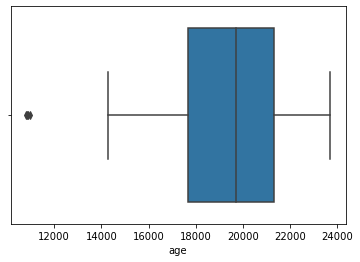

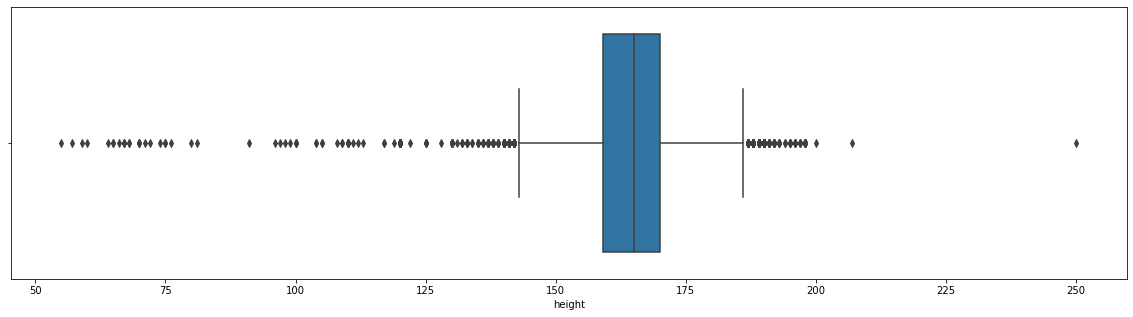

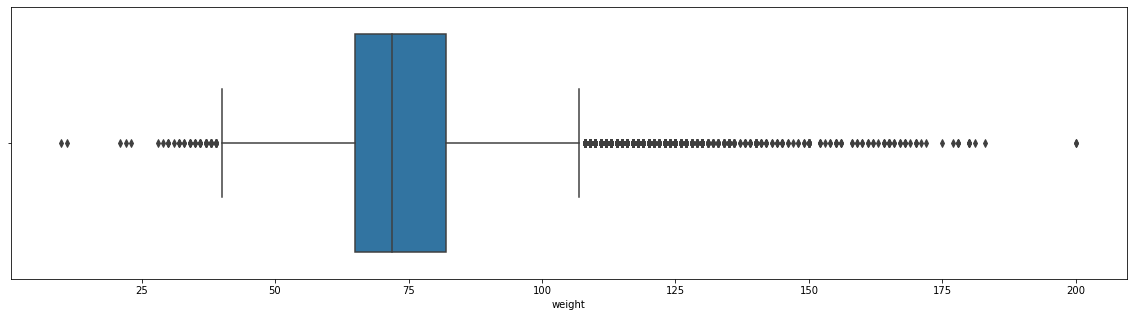

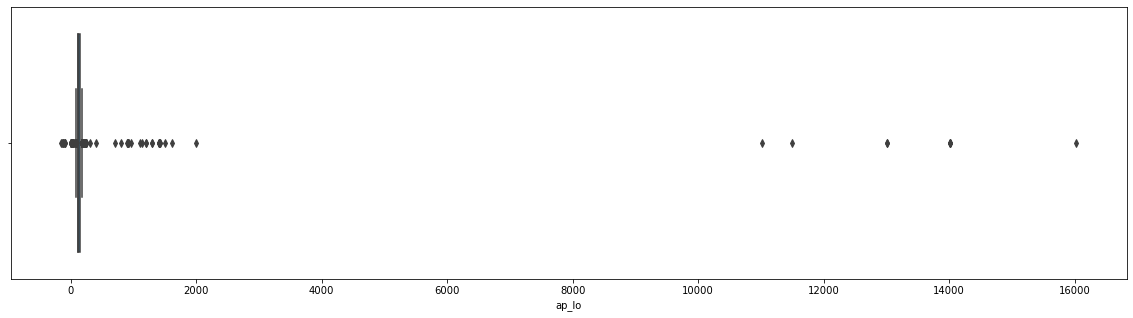

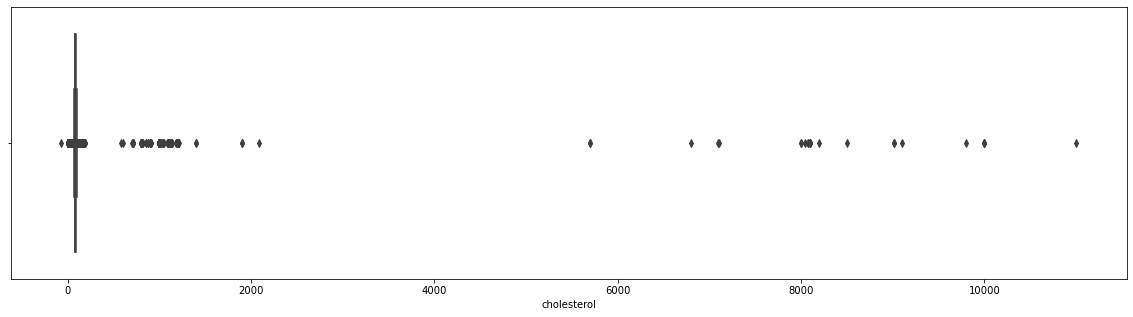

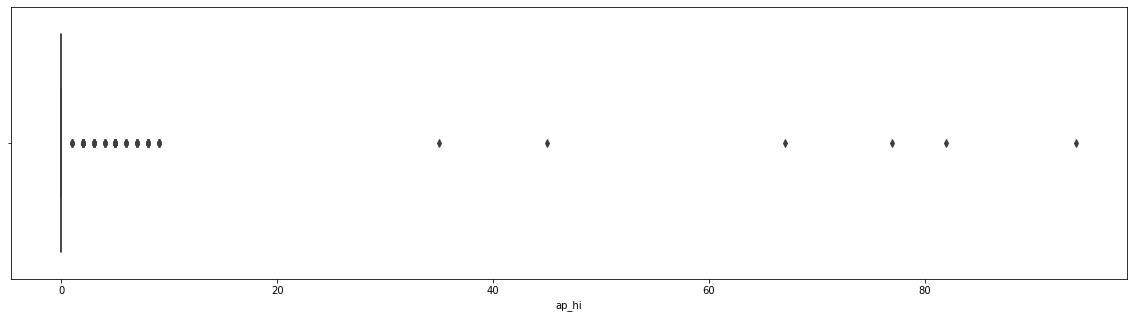

<Figure size 1440x360 with 0 Axes>

In [50]:
numerical_cols=['age','height','weight','ap_lo','cholesterol','ap_hi']
for feature in numerical_cols:
    sns.boxplot(data[feature])
    plt.figure(figsize=(20,5))

In [51]:
for i in data.iloc[:,1:-1]:
    data[i] = outlier(data[i])
    

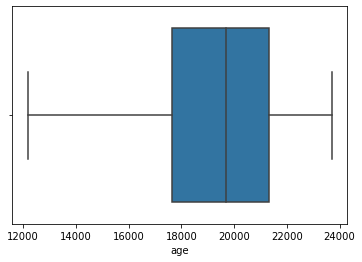

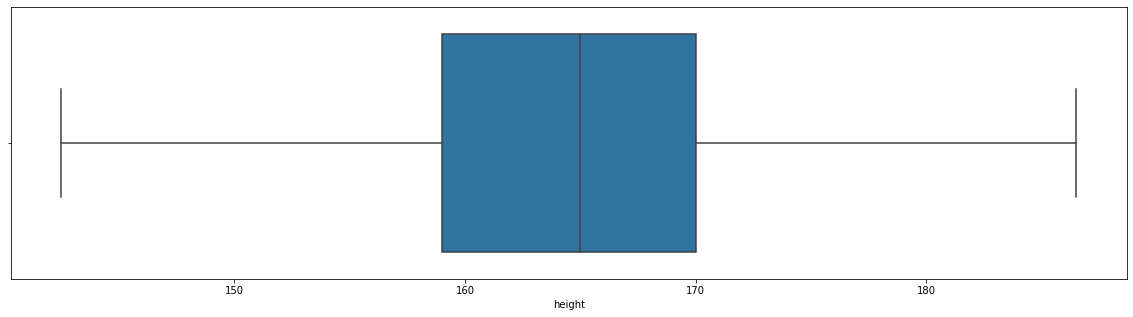

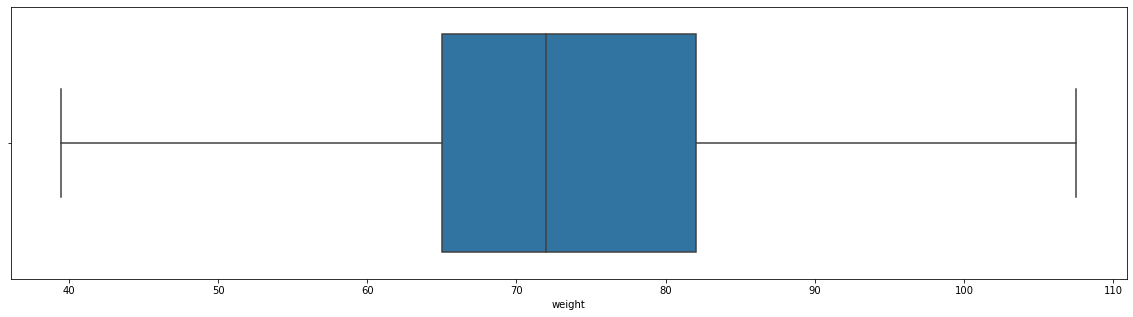

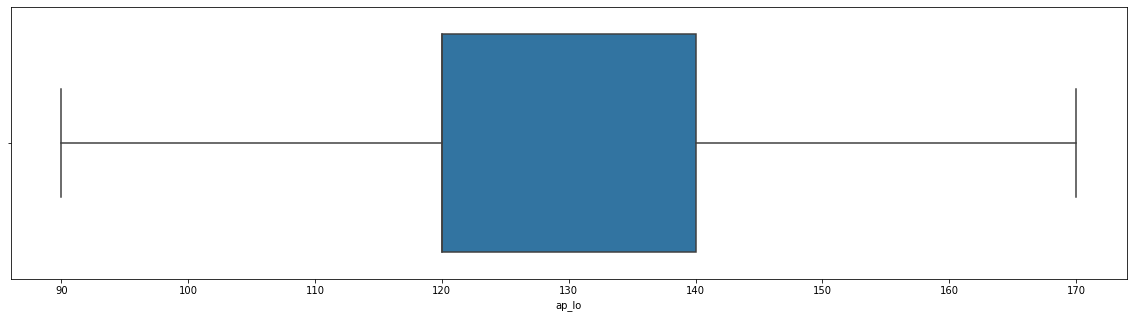

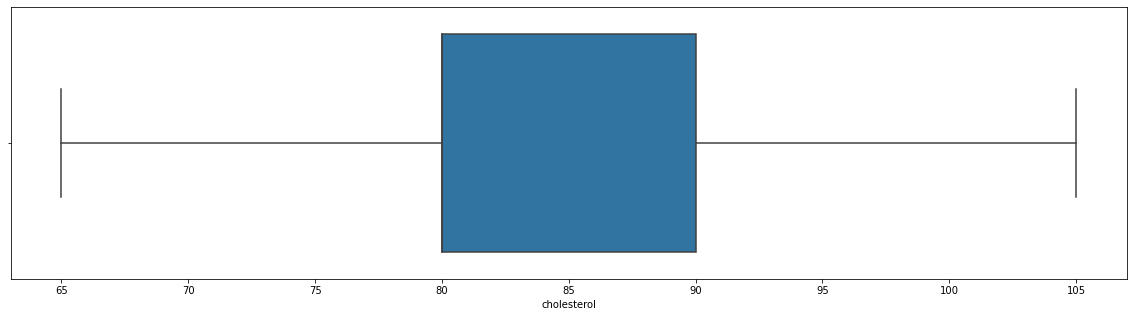

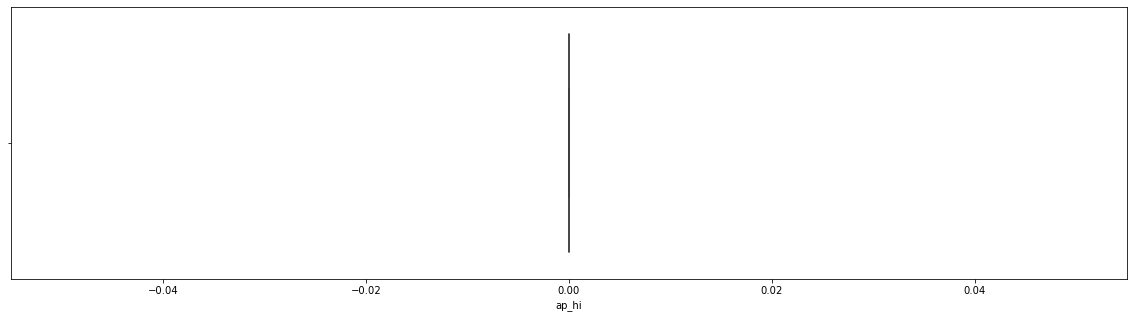

<Figure size 1440x360 with 0 Axes>

In [52]:
for feature in numerical_cols:
    sns.boxplot(data[feature])
    plt.figure(figsize=(20,5))

In [23]:
from numpy import isnan
from sklearn.impute import KNNImputer
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = KNNImputer(missing_values=np.nan)
# fit on the dataset
imputer.fit(X)
# transform the dataset
features_trans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(features_trans).flatten()))

Missing: 0
Missing: 0


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=8)

x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.50, random_state=8)

print("X train shape: ", x_train.shape)
print("X validation shape: ", x_val.shape)
print("X test shape: ", x_test.shape)
print("Y train shape: ", y_train.shape)
print("Y validation shape: ", y_val.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (49000, 12)
X validation shape:  (10500, 12)
X test shape:  (10500, 12)
Y train shape:  (49000,)
Y validation shape:  (10500,)
Y test shape:  (10500,)


In [25]:
data.shape

(70000, 14)

In [26]:
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score

In [27]:
# define the model
clf1_nopreproc = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, 
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' 
                      )

           

In [28]:
# fit the model 
clf1_nopreproc.fit(
    X_train=x_train, y_train=y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['auc','accuracy'],
    max_epochs=1000 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)     

epoch 0  | loss: 0.56761 | train_auc: 0.65433 | train_accuracy: 0.53514 | valid_auc: 0.6585  | valid_accuracy: 0.52924 |  0:00:08s
epoch 1  | loss: 0.55046 | train_auc: 0.79494 | train_accuracy: 0.72853 | valid_auc: 0.80122 | valid_accuracy: 0.73514 |  0:00:16s
epoch 2  | loss: 0.55043 | train_auc: 0.79504 | train_accuracy: 0.72794 | valid_auc: 0.80191 | valid_accuracy: 0.73724 |  0:00:24s
epoch 3  | loss: 0.55023 | train_auc: 0.7955  | train_accuracy: 0.72839 | valid_auc: 0.80077 | valid_accuracy: 0.73124 |  0:00:32s
epoch 4  | loss: 0.54901 | train_auc: 0.79546 | train_accuracy: 0.73273 | valid_auc: 0.80104 | valid_accuracy: 0.73914 |  0:00:41s
epoch 5  | loss: 0.55107 | train_auc: 0.79718 | train_accuracy: 0.73047 | valid_auc: 0.80382 | valid_accuracy: 0.73676 |  0:00:49s
epoch 6  | loss: 0.54827 | train_auc: 0.7964  | train_accuracy: 0.72982 | valid_auc: 0.80152 | valid_accuracy: 0.73114 |  0:00:56s
epoch 7  | loss: 0.54702 | train_auc: 0.7961  | train_accuracy: 0.72641 | valid_auc

epoch 63 | loss: 0.54187 | train_auc: 0.80219 | train_accuracy: 0.73555 | valid_auc: 0.80448 | valid_accuracy: 0.73933 |  0:08:51s
epoch 64 | loss: 0.54127 | train_auc: 0.8013  | train_accuracy: 0.73514 | valid_auc: 0.80428 | valid_accuracy: 0.73695 |  0:09:00s
epoch 65 | loss: 0.54351 | train_auc: 0.80183 | train_accuracy: 0.73559 | valid_auc: 0.80537 | valid_accuracy: 0.73895 |  0:09:08s
epoch 66 | loss: 0.53944 | train_auc: 0.80247 | train_accuracy: 0.73559 | valid_auc: 0.80373 | valid_accuracy: 0.73752 |  0:09:17s
epoch 67 | loss: 0.54051 | train_auc: 0.80174 | train_accuracy: 0.73488 | valid_auc: 0.80317 | valid_accuracy: 0.73714 |  0:09:25s
epoch 68 | loss: 0.54156 | train_auc: 0.80222 | train_accuracy: 0.73527 | valid_auc: 0.80533 | valid_accuracy: 0.73781 |  0:09:34s
epoch 69 | loss: 0.53814 | train_auc: 0.80198 | train_accuracy: 0.73416 | valid_auc: 0.80428 | valid_accuracy: 0.73771 |  0:09:42s
epoch 70 | loss: 0.53802 | train_auc: 0.80229 | train_accuracy: 0.73578 | valid_auc

BEST ACCURACY SCORE ON VALIDATION SET : 0.7426666666666667
BEST ACCURACY SCORE ON TEST SET : 0.7334285714285714


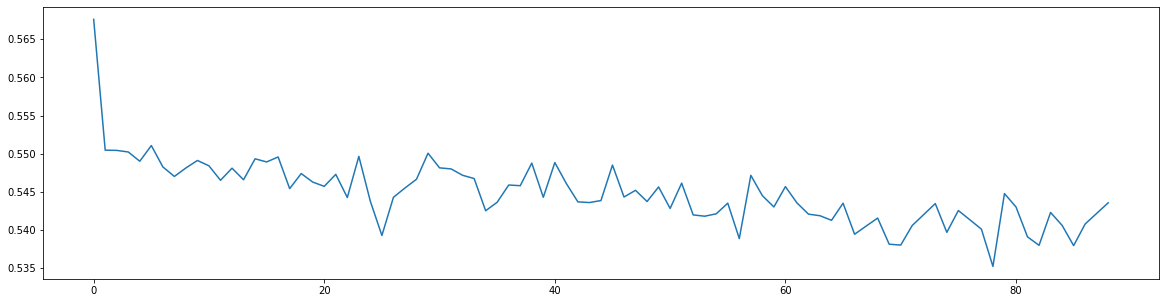

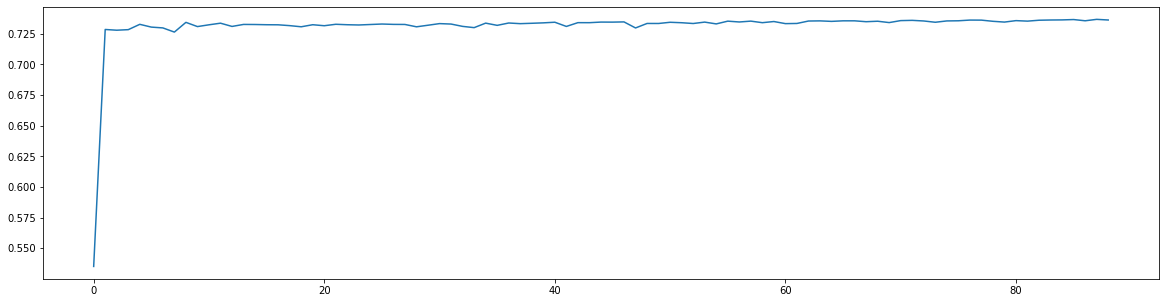

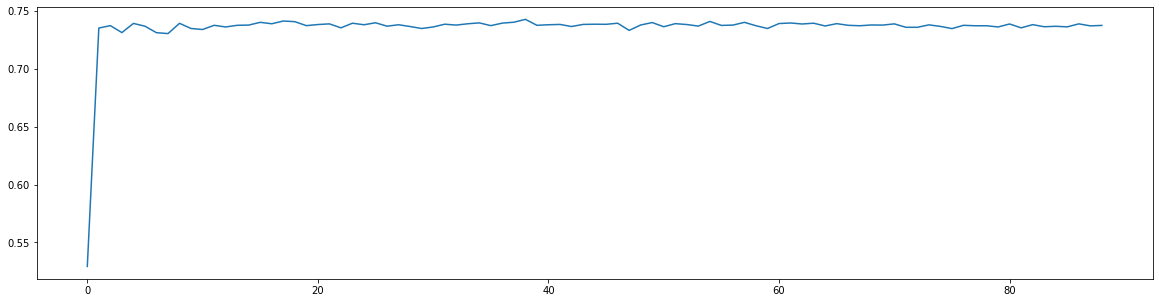

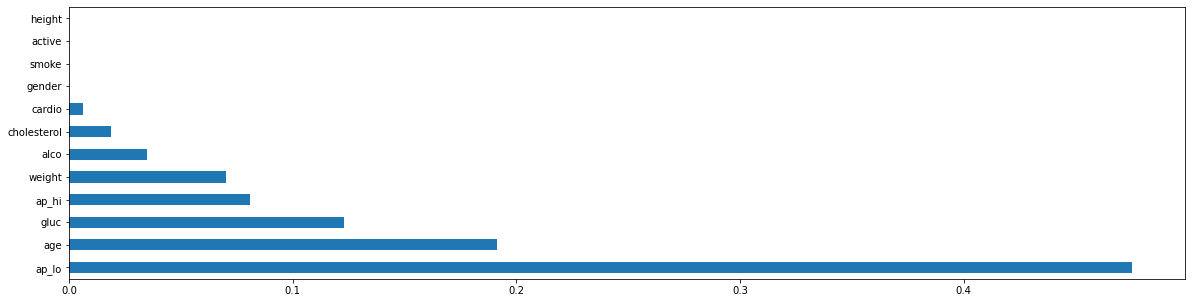

In [77]:
# plot losses
plt.figure(figsize=(20,5))
plt.plot(clf1_nopreproc.history['loss'])

# plot accuracy
plt.figure(figsize=(20,5))
plt.plot(clf1_nopreproc.history['train_accuracy'])

plt.figure(figsize=(20,5))
plt.plot(clf1_nopreproc.history['valid_accuracy'])

# find and plot feature importance
plt.figure(figsize=(20,5))
y_pred = clf1_nopreproc.predict(x_test)
clf1_nopreproc.feature_importances_
feat_importances = pd.Series(clf1_nopreproc.feature_importances_, index=colu.columns)
feat_importances.nlargest(20).plot(kind='barh')


# determine best accuracy for test set
preds = clf1_nopreproc.predict(x_test)
test_acc = accuracy_score(preds, y_test)

# determine best accuracy for validation set
preds_valid = clf1_nopreproc.predict(x_val)
valid_acc = accuracy_score(preds_valid, y_val)

print(f"BEST ACCURACY SCORE ON VALIDATION SET : {valid_acc}")
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")

In [32]:
from pytorch_tabnet.pretraining import TabNetPretrainer

# TabNetPretrainer
unsupervised_model_no_preproc = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax', # "sparsemax",
    )

# fit the model
unsupervised_model_no_preproc.fit(
    x_train,
    eval_set=[x_val],
    max_epochs=1000 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    pretraining_ratio=0.8,

)

# Make reconstruction from a dataset
reconstructed_X, embedded_X = unsupervised_model_no_preproc.predict(x_val)
assert(reconstructed_X.shape==embedded_X.shape)

unsupervised_model_no_preproc.save_model('./test_pretrain2')
loaded_pretrain = TabNetPretrainer()
loaded_pretrain.load_model('./test_pretrain2.zip')

epoch 0  | loss: 20.13339| val_0_unsup_loss_numpy: 6.85398006439209|  0:00:06s
epoch 1  | loss: 5.58679 | val_0_unsup_loss_numpy: 5.5601701736450195|  0:00:12s
epoch 2  | loss: 5.41295 | val_0_unsup_loss_numpy: 6.004469871520996|  0:00:19s
epoch 3  | loss: 5.20208 | val_0_unsup_loss_numpy: 5.522480010986328|  0:00:26s
epoch 4  | loss: 4.95771 | val_0_unsup_loss_numpy: 5.056449890136719|  0:00:34s
epoch 5  | loss: 4.72754 | val_0_unsup_loss_numpy: 4.752600193023682|  0:00:40s
epoch 6  | loss: 4.40403 | val_0_unsup_loss_numpy: 4.421989917755127|  0:00:48s
epoch 7  | loss: 4.052   | val_0_unsup_loss_numpy: 4.208390235900879|  0:00:55s
epoch 8  | loss: 3.69177 | val_0_unsup_loss_numpy: 3.9624199867248535|  0:01:01s
epoch 9  | loss: 3.28629 | val_0_unsup_loss_numpy: 3.727299928665161|  0:01:08s
epoch 10 | loss: 2.92172 | val_0_unsup_loss_numpy: 3.5631399154663086|  0:01:14s
epoch 11 | loss: 2.60942 | val_0_unsup_loss_numpy: 3.4153599739074707|  0:01:21s
epoch 12 | loss: 2.29444 | val_0_unsu

epoch 102| loss: 0.59233 | val_0_unsup_loss_numpy: 3.2829999923706055|  0:12:16s
epoch 103| loss: 0.59685 | val_0_unsup_loss_numpy: 3.0646800994873047|  0:12:24s
epoch 104| loss: 0.59129 | val_0_unsup_loss_numpy: 2.8478899002075195|  0:12:31s
epoch 105| loss: 0.58997 | val_0_unsup_loss_numpy: 3.324359893798828|  0:12:39s
epoch 106| loss: 0.58856 | val_0_unsup_loss_numpy: 3.4442200660705566|  0:12:46s
epoch 107| loss: 0.58733 | val_0_unsup_loss_numpy: 2.9062299728393555|  0:12:53s
epoch 108| loss: 0.6025  | val_0_unsup_loss_numpy: 3.5076100826263428|  0:13:00s
epoch 109| loss: 0.58702 | val_0_unsup_loss_numpy: 3.3370399475097656|  0:13:08s

Early stopping occurred at epoch 109 with best_epoch = 59 and best_val_0_unsup_loss_numpy = 1.4325100183486938
Successfully saved model at ./test_pretrain2.zip
